Nghiệm nội suy tại t* = 5.81 là 0.002997426677319831


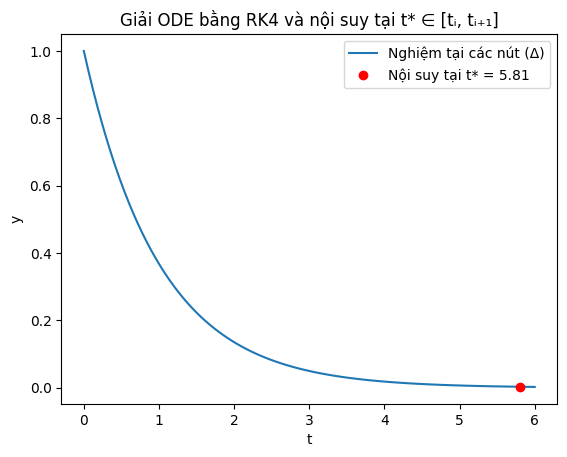

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_step(g, t, y, h):
    """
    Tính một bước RK4 cho ODE.
    """
    k1 = g(t, y)
    k2 = g(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = g(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = g(t + h, y + h * k3)
    y_next = y + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y_next

def solve_ode_rk4(g, t0, y0, t_end, N):
    """
    Giải ODE bằng phương pháp RK4 trên lưới Δ = {t₀, t₁, ..., t_f}.
    
    Tham số:
      g    : hàm mô tả ODE (g(t, y))
      t0   : thời gian ban đầu
      y0   : giá trị ban đầu của nghiệm
      t_end: thời gian kết thúc
      N    : số bước chia khoảng [t0, t_end]
      
    Trả về:
      t_grid : mảng thời gian của lưới Δ
      y_grid : mảng nghiệm ứng với các thời điểm trong t_grid
    """
    h = (t_end - t0) / N
    t_grid = np.linspace(t0, t_end, N+1)
    y_grid = np.zeros((N+1,) + np.shape(y0))
    y_grid[0] = y0
    for i in range(N):
        y_grid[i+1] = rk4_step(g, t_grid[i], y_grid[i], h)
    return t_grid, y_grid

def interpolate_in_step(g, t_i, y_i, h, theta):
    """
    Nội suy nghiệm trong một bước [tᵢ, tᵢ₊₁] với:
      theta = (t* - tᵢ)/h,  t* ∈ [tᵢ, tᵢ₊₁]
      
    Sử dụng công thức:
      η(tᵢ+θh) = yᵢ + h * sum(b_j(θ) * K_j)
    với:
      b_j(θ)= 3(2c_j-1)b_jθ² + 2(2-3c_j)b_jθ.
      
    Bảng Butcher của RK4:
      c = [0, 0.5, 0.5, 1]
      b = [1/6, 1/3, 1/3, 1/6]
    """
    c = [0.0, 0.5, 0.5, 1.0]
    b = [1/6, 1/3, 1/3, 1/6]
    
    # Tính các giai đoạn (K_j) cho bước [tᵢ, tᵢ₊₁]
    k1 = g(t_i, y_i)
    k2 = g(t_i + 0.5 * h, y_i + 0.5 * h * k1)
    k3 = g(t_i + 0.5 * h, y_i + 0.5 * h * k2)
    k4 = g(t_i + h, y_i + h * k3)
    
    # Tính các hệ số nội suy b_j(θ)
    b_theta = [3*(2*cj - 1)*bj*theta**2 + 2*(2 - 3*cj)*bj*theta for cj, bj in zip(c, b)]
    
    # Tính nghiệm nội suy tại t* = tᵢ + θh
    y_interp = y_i + h * (b_theta[0]*k1 + b_theta[1]*k2 + b_theta[2]*k3 + b_theta[3]*k4)
    return y_interp

def interpolate_solution(g, t_grid, y_grid, t_star):
    """
    Cho nghiệm tính được trên lưới Δ, tìm nghiệm nội suy tại t* ∈ [tᵢ, tᵢ₊₁].
    
    Thực hiện:
      1. Tìm chỉ số i sao cho tᵢ ≤ t* ≤ tᵢ₊₁.
      2. Tính θ = (t* - tᵢ)/h với h = tᵢ₊₁ - tᵢ.
      3. Tính nghiệm nội suy sử dụng interpolate_in_step.
    """
    i = np.searchsorted(t_grid, t_star) - 1
    if i < 0:
        i = 0
    if i >= len(t_grid) - 1:
        i = len(t_grid) - 2
    t_i = t_grid[i]
    t_ip1 = t_grid[i+1]
    h = t_ip1 - t_i
    theta = (t_star - t_i) / h
    y_interp = interpolate_in_step(g, t_i, y_grid[i], h, theta)
    return y_interp

# Ví dụ: Giải ODE y' = -2y + t với y(0) = 1 trên khoảng [0, 2]
def f(t, y):
    return -y

# Thông số bài toán
t0 = 0
y0 = 1
t_end = 6
N = 100  # số bước chia nhỏ

# Giải ODE trên lưới Δ
t_grid, y_grid = solve_ode_rk4(f, t0, y0, t_end, N)

# Giả sử ta muốn tính nghiệm nội suy tại một điểm t* bất kỳ trong một khoảng [tᵢ, tᵢ₊₁]
t_star = 5.81  # Ví dụ: t* = 0.75 nằm trong khoảng [tᵢ, tᵢ₊₁]
y_interp = interpolate_solution(f, t_grid, y_grid, t_star)
print("Nghiệm nội suy tại t* =", t_star, "là", y_interp)

# Vẽ đồ thị: nghiệm tại các nút và điểm nội suy tại t*
plt.plot(t_grid, y_grid, label="Nghiệm tại các nút (Δ)")
plt.plot(t_star, y_interp, 'ro', label=f"Nội suy tại t* = {t_star}")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Giải ODE bằng RK4 và nội suy tại t* ∈ [tᵢ, tᵢ₊₁]")
plt.legend()
plt.show()


t = 0.0000, y =     1.000000
t = 0.0100, y =     1.001367
t = 0.2705, y =     1.048559
t = 0.5138, y =     1.121418
t = 0.7284, y =     1.222748
t = 0.9197, y =     1.358172
t = 1.0000, y =     1.432333


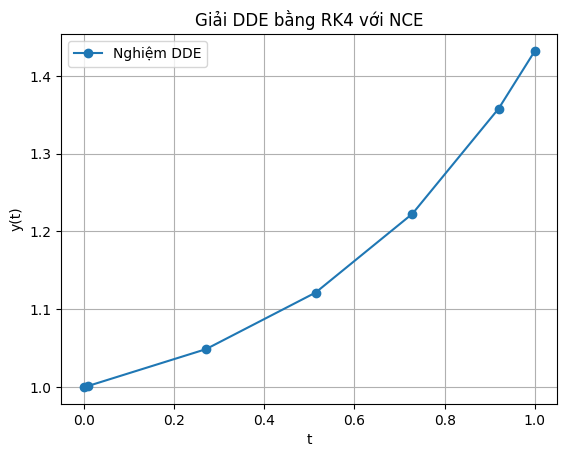

In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
# --- CÁC HÀM CHÚC NĂNG ---



# --- Continuous Extension (NCE) cho RK4 ---
def continuous_extension(segment, t_eval):
    """
    Với một segment đã lưu dưới dạng (t0, h, y0, k1, k2, k3, k4),
    tính u(t_eval) với t_eval trong [t0, t0+h].
    """
    t0, h, y0, k1, k2, k3, k4 = segment
    theta = (t_eval - t0) / h
    return y0 + h * ( (1/6)*theta*(6 - 9*theta + 4*theta**2)*k1 +
                      (1/3)*theta**2*(3 - 2*theta)*(k2 + k3) +
                      (1/6)*theta*(-1 + 6*theta - 5*theta**2 + theta**3)*k4 )

# --- Bước RK4 có NCE ---
def rk4_step(f, delay_func, history_eval, t, y, h):
    # Tính k1
    t1 = t
    tau = delay_func(t, y)
    t_delay = t - tau
    y_delay = history_eval(t_delay)
    k1 = f(t, y, y_delay)
    
    # Tính k2
    t2 = t + h/2
    y2 = y + (h/2)*k1
    tau = delay_func(t2, y2)
    t_delay = t2 - tau
    y_delay = history_eval(t_delay)
    k2 = f(t2, y2, y_delay)
    
    # Tính k3
    t3 = t + h/2
    y3 = y + (h/2)*k2
    tau = delay_func(t3, y3)
    t_delay = t3 - tau
    y_delay = history_eval(t_delay)
    k3 = f(t3, y3, y_delay)
    
    # Tính k4
    t4 = t + h
    y4 = y + h*k3
    tau = delay_func(t4, y4)
    t_delay = t4 - tau
    y_delay = history_eval(t_delay)
    k4 = f(t4, y4, y_delay)
    
    y_next = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    segment = (t, h, y, k1, k2, k3, k4)
    return y_next, segment

# --- Lớp History để lưu các đoạn giải và nội suy giá trị nghiệm ---
class History:
    def __init__(self, t0, phi):
        self.segments = []  # danh sách các đoạn: mỗi đoạn là tuple (t_start, h, y_start, k1, k2, k3, k4)
        self.t0 = t0
        self.phi = phi  # hàm lịch sử cho t <= t0
    
    def add_segment(self, segment):
        self.segments.append(segment)
    
    def eval(self, t_eval):
        # Nếu t_eval <= t0, dùng hàm lịch sử phi
        if t_eval <= self.t0:
            return self.phi(t_eval)
        # Tìm đoạn chứa t_eval (giả sử các đoạn lưu theo thứ tự tăng dần)
        for seg in self.segments:
            t_start, h, _, _, _, _, _ = seg
            t_end = t_start + h
            if t_start <= t_eval <= t_end:
                return continuous_extension(seg, t_eval)
        # Nếu t_eval vượt quá miền đã lưu, trả về giá trị tại điểm cuối của đoạn cuối.
        if self.segments:
            last_seg = self.segments[-1]
            return continuous_extension(last_seg, last_seg[0] + last_seg[1])
        return None

# --- Bước RK4 thích nghi (adaptive) sử dụng kỹ thuật hai bước h/2 ---
def rk4_step_adaptive(f, delay_func, history_eval, t, y, h, tol):
    # Tính một bước h đầy đủ
    y_full, seg_full = rk4_step(f, delay_func, history_eval, t, y, h)
    # Tính hai bước h/2 liên tiếp
    y_half, seg_half = rk4_step(f, delay_func, history_eval, t, y, h/2)
    y_half2, seg_half2 = rk4_step(f, delay_func, history_eval, t + h/2, y_half, h/2)
    # Ước lượng sai số (cho bài toán scalar, dùng trị tuyệt đối)
    err = abs(y_half2 - y_full)
    # Tính hệ số điều chỉnh bước (với bậc 4: sử dụng lũy thừa 1/5 hoặc 1/(order+1) tùy cách định nghĩa)
    if err == 0:
        factor = 2.0
    else:
        factor = 0.9 * (tol * h / (2*err))**0.25
    h_new = factor * h
    if err < tol:
        # Chấp nhận bước: lưu hai đoạn h/2 vào history (ta có thể nối lại nếu cần)
        segments = [seg_half, seg_half2]
        return y_half2, segments, h_new, True
    else:
        return None, None, h_new, False

# --- Hàm tích hợp chính cho DDE sử dụng bước thích nghi và NCE ---
def solve_dde(f, delay_func, phi, t0, t_final, h_init, tol):
    history = History(t0, phi)
    t = t0
    y = phi(t0)
    solution_times = [t]
    solution_values = [y]
    
    h = h_init
    while t < t_final:
        # Đảm bảo không vượt quá t_final
        if t + h > t_final:
            h = t_final - t
        result = rk4_step_adaptive(f, delay_func, history.eval, t, y, h, tol)
        accepted = result[3]
        if accepted:
            y_new, segments, h_new, _ = result
            # Lưu các đoạn vừa tính được vào history
            for seg in segments:
                history.add_segment(seg)
            t = t + h
            y = y_new
            solution_times.append(t)
            solution_values.append(y)
            h = h_new
        else:
            # Nếu bước bị từ chối, giảm kích thước bước và thử lại
            h = result[2]
    return solution_times, solution_values, history
# Hàm lịch sử (phi): nghiệm đã biết cho t <= t0.
def phi(t):
    # Ví dụ: nghiệm lịch sử là hằng số 1.
    return np.exp(t)

# Hàm f(t, y, y_delay) cho DDE: y'(t) = - y(t-τ)
def f(t, y, y_delay):
    return y_delay

# Hàm delay_func(t, y): trả về độ trễ (ở đây τ = 1.0)
def delay_func(t, y):
    return 2-t
# --- Ví dụ sử dụng ---
if __name__ == '__main__':
    # Giải DDE: y'(t) = - y(t-1), với y(t)=1 cho t<=0, trên khoảng t in [0, 10]
    t0 = 0.0
    t_final = 1.0
    h_init = 0.01
    tol = 1e-5
    
    sol_times, sol_values, history = solve_dde(f, delay_func, phi, t0, t_final, h_init, tol)
    
    # In kết quả (các giá trị tại các điểm lưới)
    for t_val, y_val in zip(sol_times, sol_values):
        print(f"t = {t_val:6.4f}, y = {y_val:12.6f}")
    #vẽ đồ thị nghiệm
    plt.plot(sol_times, sol_values,"-o", label="Nghiệm DDE")
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title("Giải DDE bằng RK4 với NCE")
    plt.legend()
    plt.grid()
    plt.show()
def y_exact(t):
    return t**2


In [47]:
len(sol_times), len(sol_values), len(history.segments)

(3672, 3672, 7342)